In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [62]:
data=pd.read_csv('HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [63]:
data.shape

(14999, 10)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


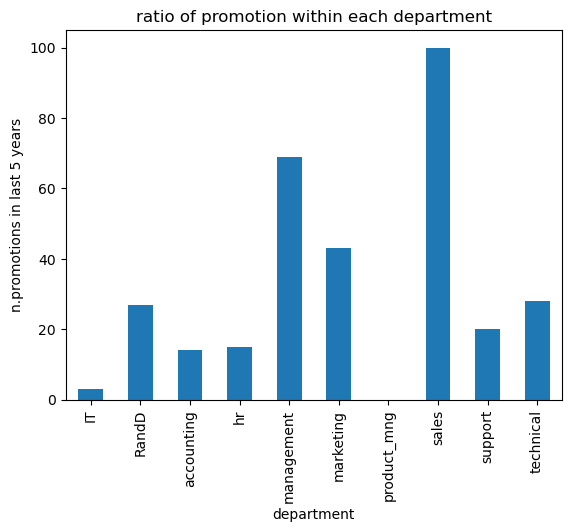

In [65]:
p5=data.groupby('Department')['promotion_last_5years'].sum().plot(kind='bar')
plt.xlabel('department')
plt.ylabel('n.promotions in last 5 years')
plt.title('ratio of promotion within each department')
plt.show()

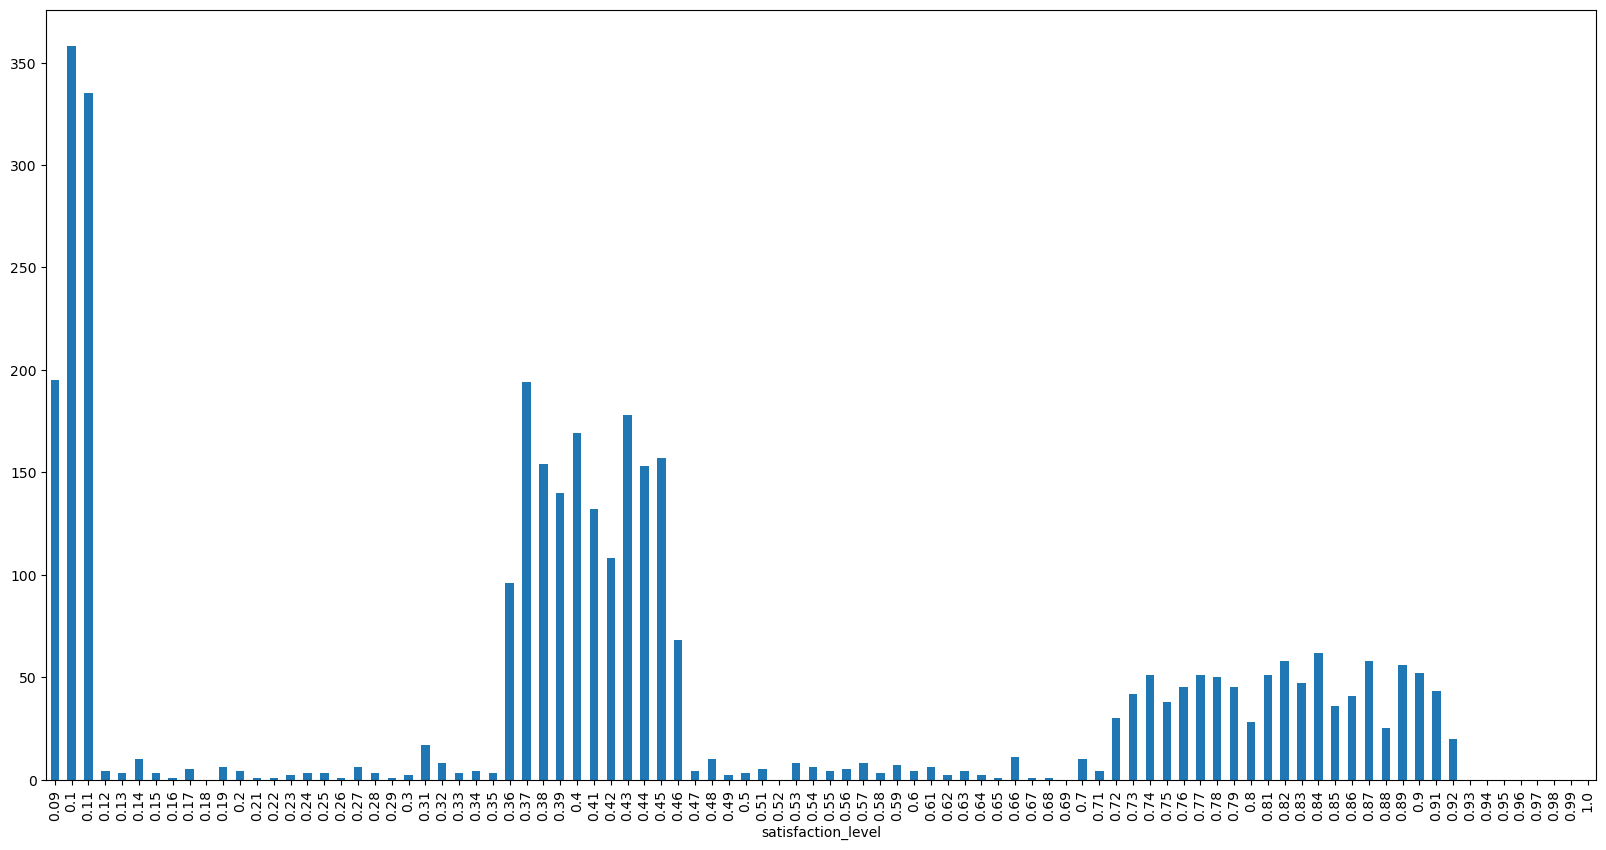

In [66]:
plt.figure(figsize=(20,10))
data.groupby('satisfaction_level')['left'].sum().plot(kind='bar')
plt.show()
##big feature

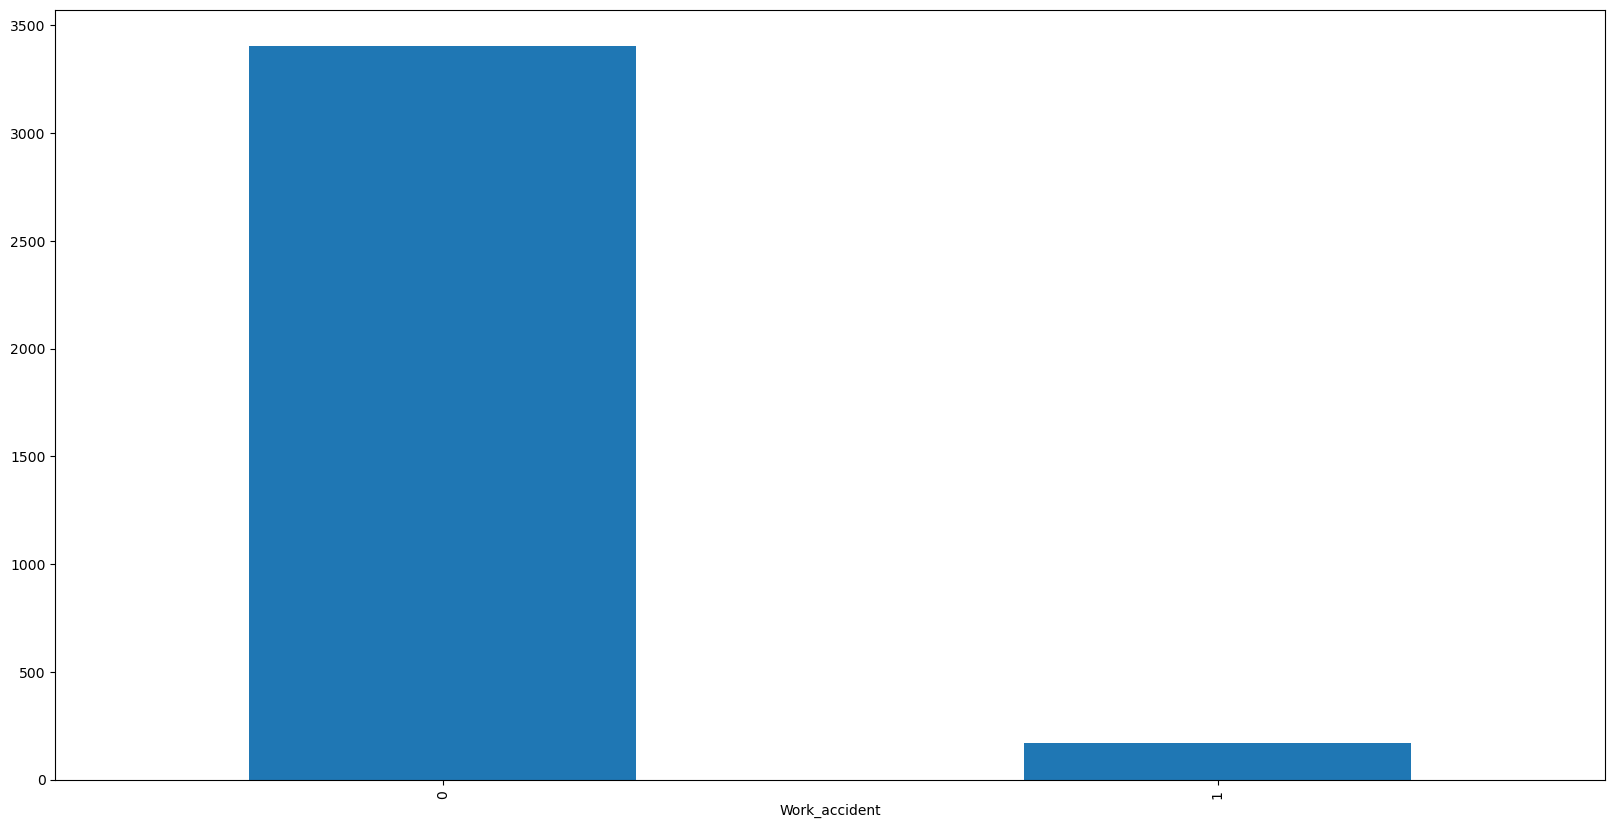

In [67]:
plt.figure(figsize=(20,10))
data.groupby('Work_accident')['left'].sum().plot(kind='bar')
plt.show()
##not a feature

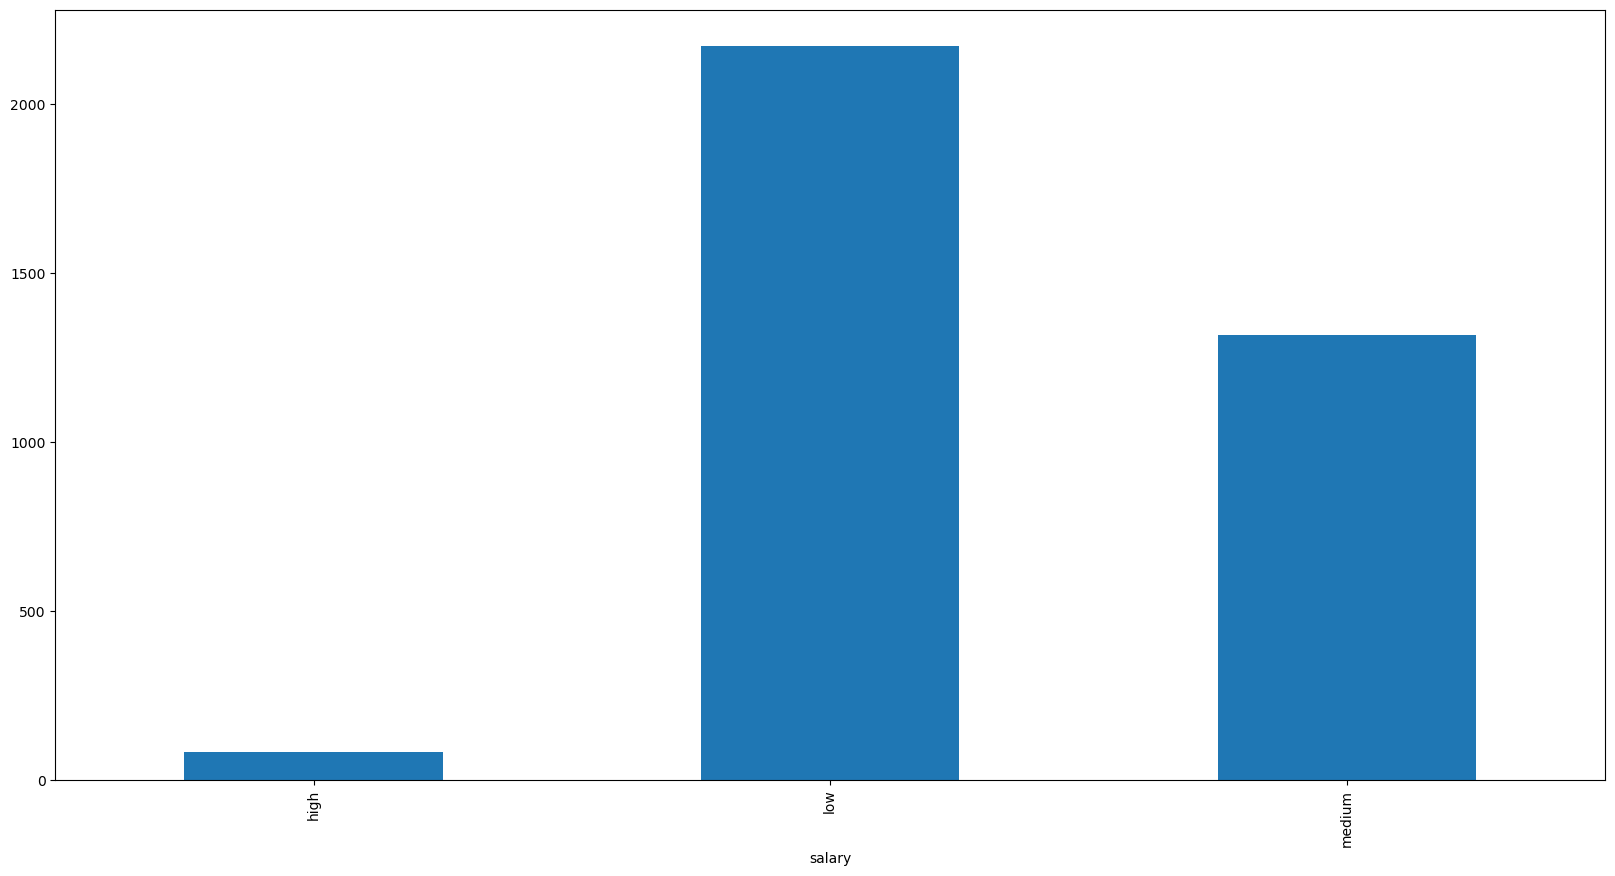

In [68]:
plt.figure(figsize=(20,10))
data.groupby('salary')['left'].sum().plot(kind='bar')
plt.show()
##big feature

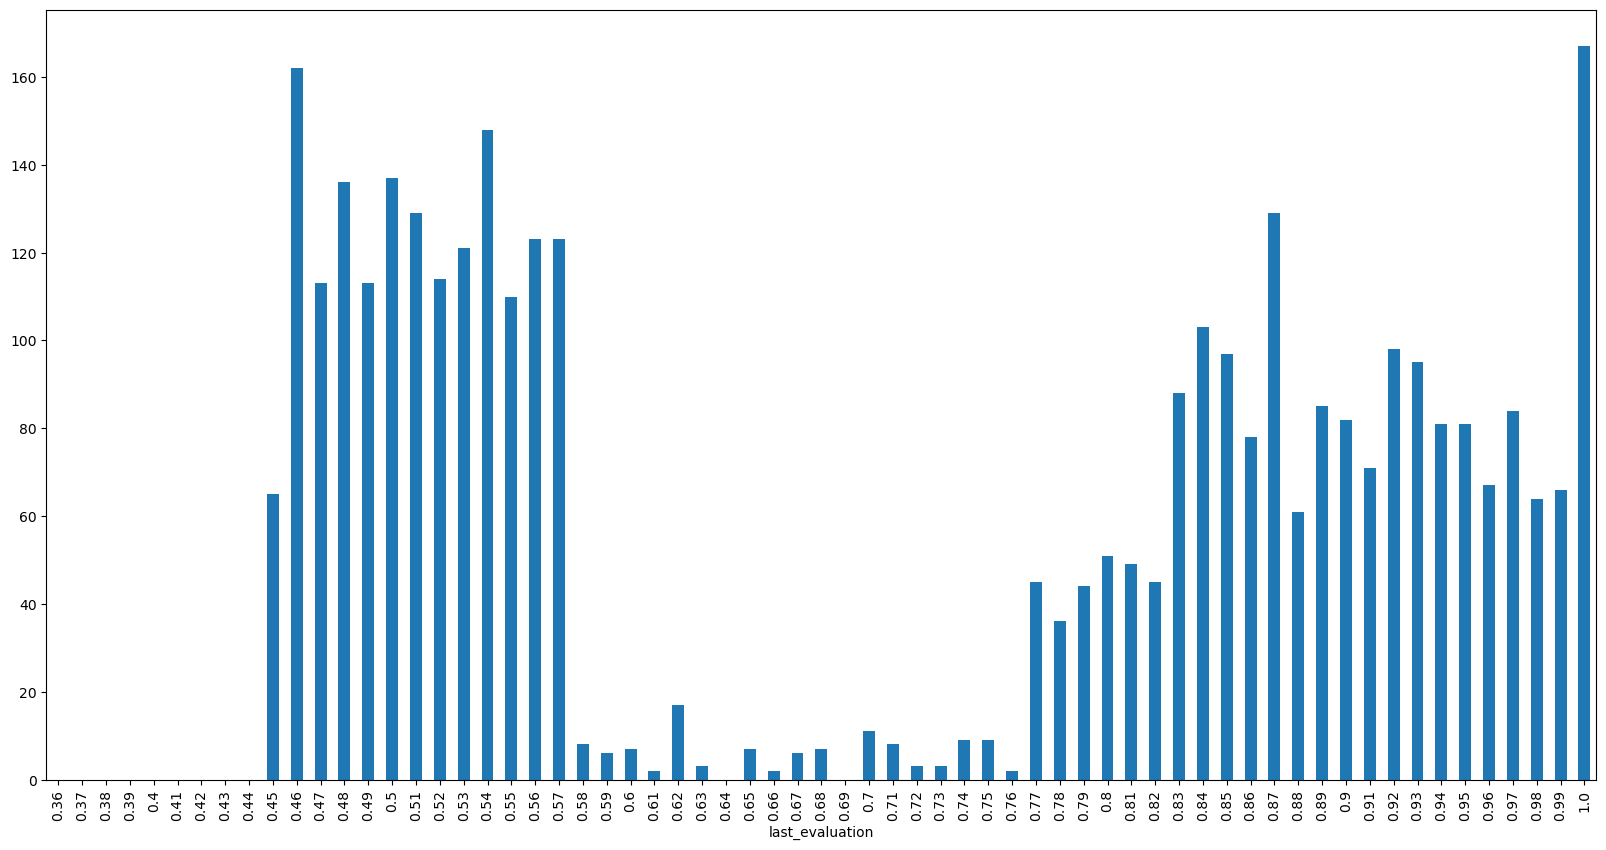

In [69]:
plt.figure(figsize=(20,10))
data.groupby('last_evaluation')['left'].sum().plot(kind='bar')
plt.show()
##not a feature

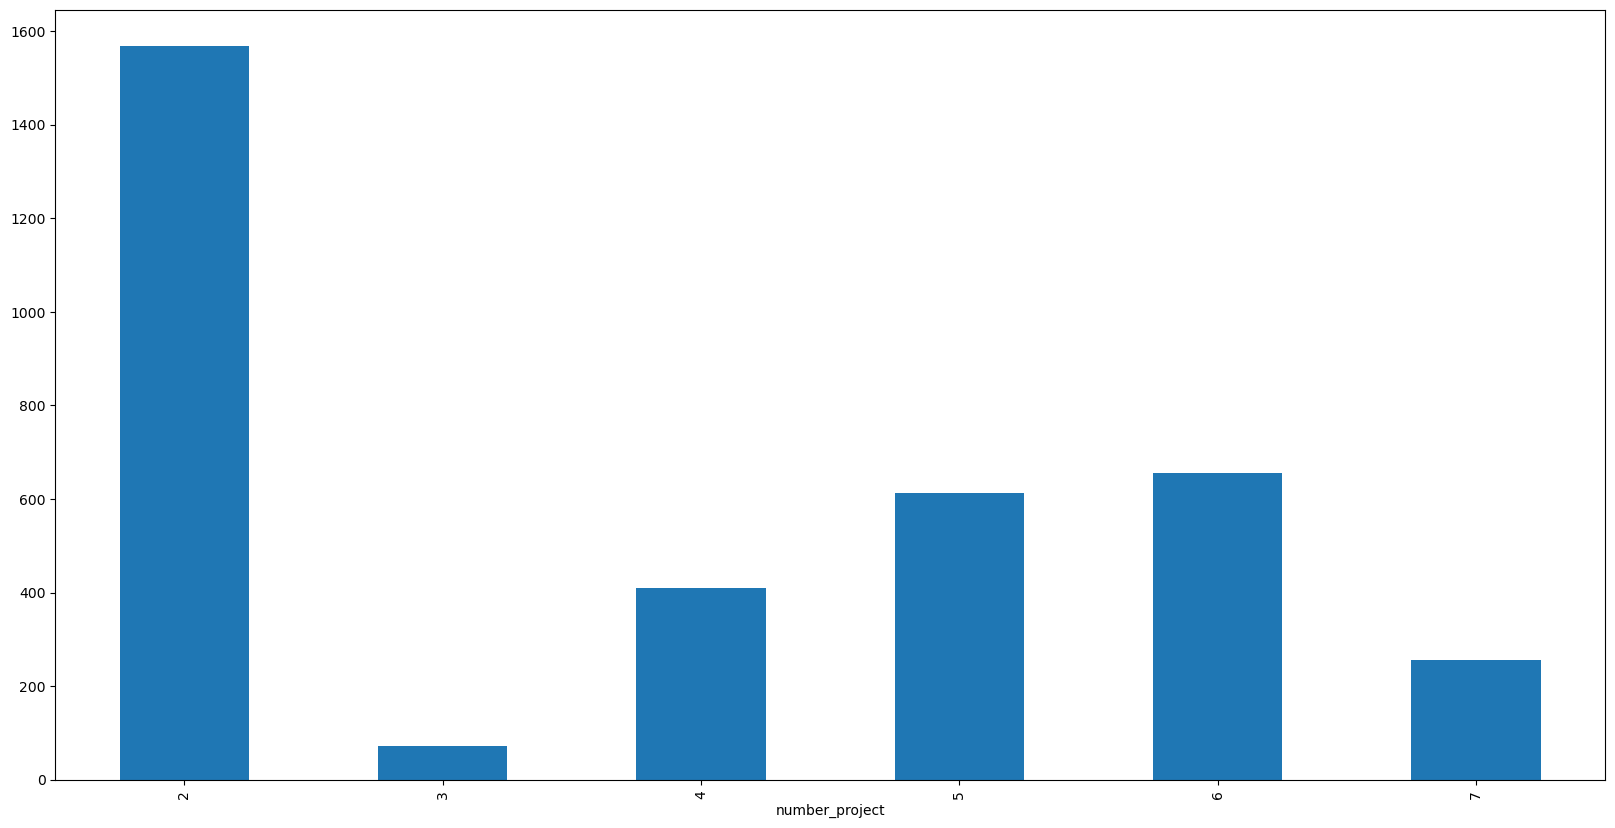

In [70]:
plt.figure(figsize=(20,10))
data.groupby('number_project')['left'].sum().plot(kind='bar')
plt.show()

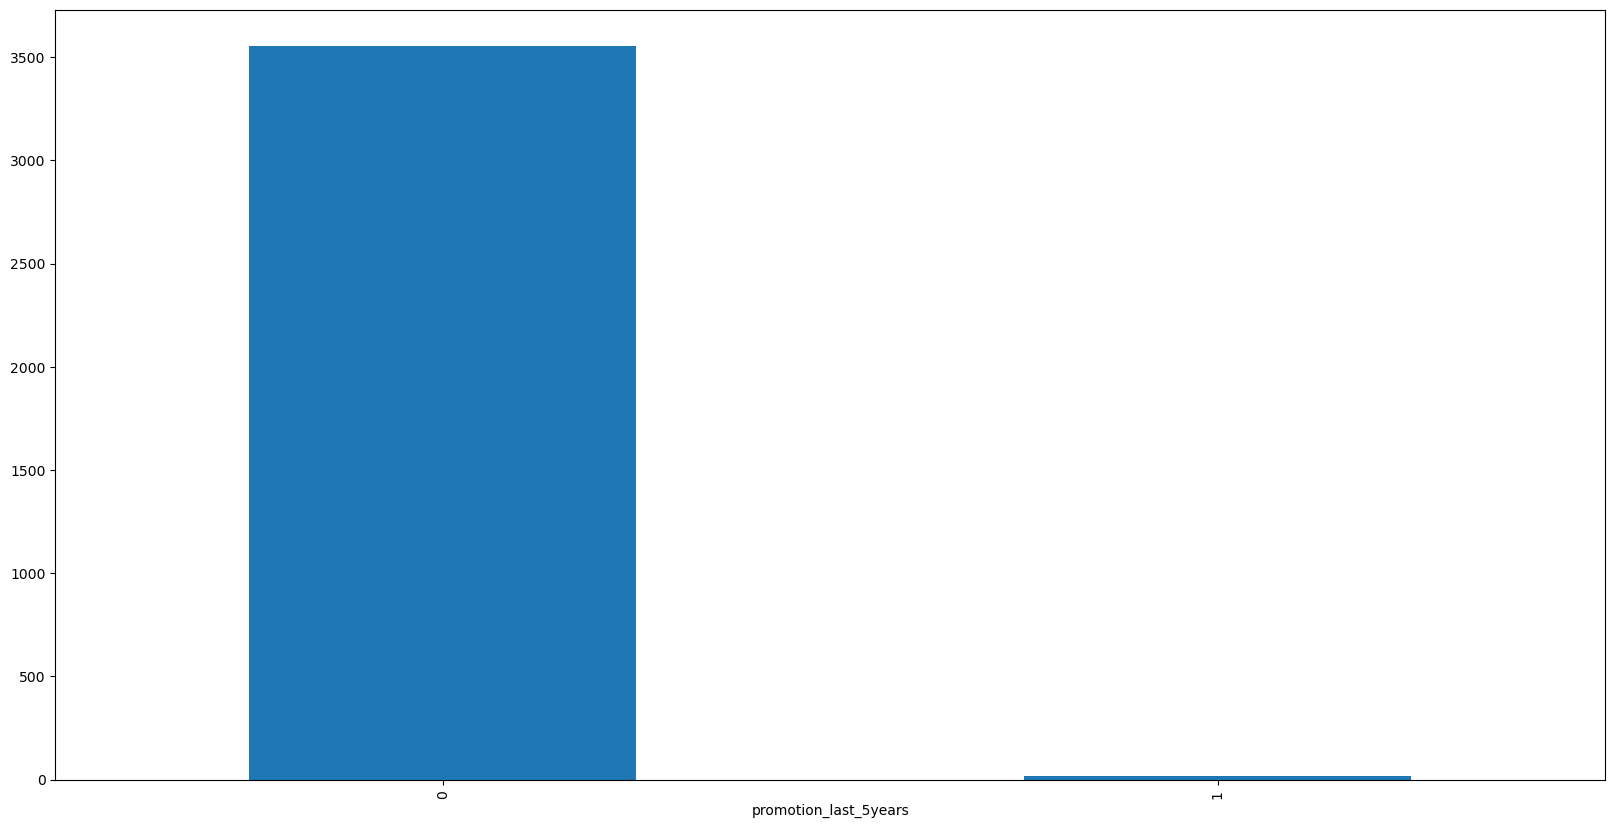

In [71]:
plt.figure(figsize=(20,10))
data.groupby('promotion_last_5years')['left'].sum().plot(kind='bar')
plt.show()
##feature

In [72]:
new=data.drop(['Work_accident'],axis=1)

In [73]:
new.duplicated().sum()

3008

In [74]:
new.drop_duplicates(inplace=True)

In [75]:
new.shape

(11991, 9)

In [83]:
df=pd.get_dummies(new)
y=df.left
x=df.drop(['left'],axis=1)
classification=LogisticRegression()

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [87]:
classification.fit(x_train,y_train)

LogisticRegression()

In [88]:
classification.score(x_train,y_train)

0.8391367806505421

In [89]:
classification.score(x_test,y_test)

0.8320133388912047

In [90]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'left',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_montly_hours    11991 non-null  int64  
 4   time_spend_company      11991 non-null  int64  
 5   left                    11991 non-null  int64  
 6   promotion_last_5years   11991 non-null  int64  
 7   Department_IT           11991 non-null  uint8  
 8   Department_RandD        11991 non-null  uint8  
 9   Department_accounting   11991 non-null  uint8  
 10  Department_hr           11991 non-null  uint8  
 11  Department_management   11991 non-null  uint8  
 12  Department_marketing    11991 non-null  uint8  
 13  Department_product_mng  11991 non-null  uint8  
 14  Department_sales        11991 non-null

In [101]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
11996,0.74,0.95,5,266,10,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
11997,0.85,0.54,3,185,10,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
11998,0.33,0.65,3,172,10,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [103]:
''''
t=np.arr
x1=float(input('satisfaction_level :'))
x2=float(input('last_evaluation :'))
x3=int(input('number_of_projects :'))
x4=int(input('monthly_hours :'))
x5=int(input('time_spend_company :'))
while True:
     x6=int(input('promotion_last_5years :enter 0 or 1:'))
     if (x6==0)|(x6==1):
 #       break
#while True:
''''


SyntaxError: EOL while scanning string literal (575042224.py, line 13)

In [97]:
x6

1